# Assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df.shape

(506, 13)

In [4]:
X = df

In [5]:
y = boston_data.target

In [6]:
X.mean(axis=0)

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [7]:
from sklearn import preprocessing

## Perform Standardization / Mean Removal as part of your data pre-processing step on all the features of the Boston Housing data set 

### First Way shown using preprocessing

In [8]:
X_scaled = preprocessing.scale(X)

In [10]:
X_scaled

array([[-0.41771335,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41526932, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41527165, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ..., 
       [-0.41137448, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40568883, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41292893, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [11]:
X_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

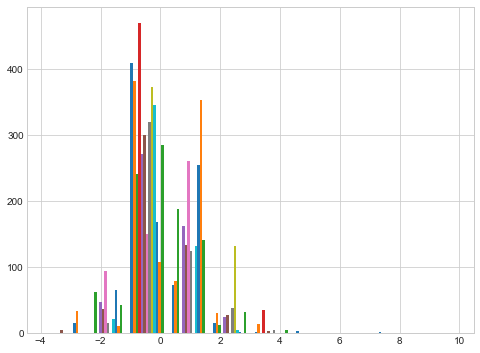

In [30]:
plt.figure(figsize=(8,6))
plt.hist(X_scaled);

In [45]:
pd.DataFrame(X_scaled, columns=boston_data.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### Second way using Standard Scaler

In [12]:
scaler = preprocessing.StandardScaler().fit(X)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaler.mean_

array([  3.59376071e+00,   1.13636364e+01,   1.11367787e+01,
         6.91699605e-02,   5.54695059e-01,   6.28463439e+00,
         6.85749012e+01,   3.79504269e+00,   9.54940711e+00,
         4.08237154e+02,   1.84555336e+01,   3.56674032e+02,
         1.26530632e+01])

In [14]:
scaler.scale_

array([  8.58828355e+00,   2.32993957e+01,   6.85357058e+00,
         2.53742935e-01,   1.15763115e-01,   7.01922514e-01,
         2.81210326e+01,   2.10362836e+00,   8.69865112e+00,
         1.68370495e+02,   2.16280519e+00,   9.12046075e+01,
         7.13400164e+00])

In [31]:
X_scaled = scaler.transform(X)

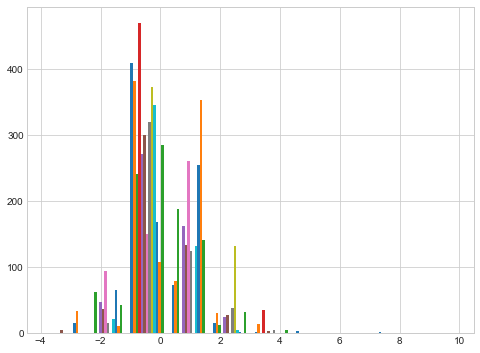

In [32]:
plt.figure(figsize=(8,6))
plt.hist(X_scaled);

In [46]:
pd.DataFrame(X_scaled, columns=boston_data.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


## Perform Min-Max or Scaling Features to a Range as part of your data pre-processing step on all the features of the Boston Housing data set 

In [33]:
min_max_scaler = preprocessing.MinMaxScaler() #feature_range=(0, 1), copy=True

In [34]:
X_minmax = min_max_scaler.fit_transform(X_scaled)

In [35]:
X_minmax

array([[  0.00000000e+00,   1.80000000e-01,   6.78152493e-02, ...,
          2.87234043e-01,   1.00000000e+00,   8.96799117e-02],
       [  2.35922539e-04,   0.00000000e+00,   2.42302053e-01, ...,
          5.53191489e-01,   1.00000000e+00,   2.04470199e-01],
       [  2.35697744e-04,   0.00000000e+00,   2.42302053e-01, ...,
          5.53191489e-01,   9.89737254e-01,   6.34657837e-02],
       ..., 
       [  6.11892474e-04,   0.00000000e+00,   4.20454545e-01, ...,
          8.93617021e-01,   1.00000000e+00,   1.07891832e-01],
       [  1.16072990e-03,   0.00000000e+00,   4.20454545e-01, ...,
          8.93617021e-01,   9.91300620e-01,   1.31070640e-01],
       [  4.61841693e-04,   0.00000000e+00,   4.20454545e-01, ...,
          8.93617021e-01,   1.00000000e+00,   1.69701987e-01]])

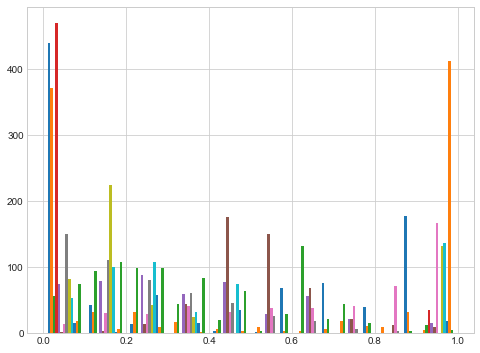

In [36]:
plt.figure(figsize=(8,6))
plt.hist(X_minmax);

In [47]:
pd.DataFrame(X_minmax, columns=boston_data.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


## Perform Normalization as part of your data pre-processing step on all the features of the Boston Housing data set 

### L1 normalization, Least Absolute Deviations Ensure the sum of absolute values is 1 in each row.

In [41]:
X_normalized = preprocessing.normalize(X_minmax, norm='l1')

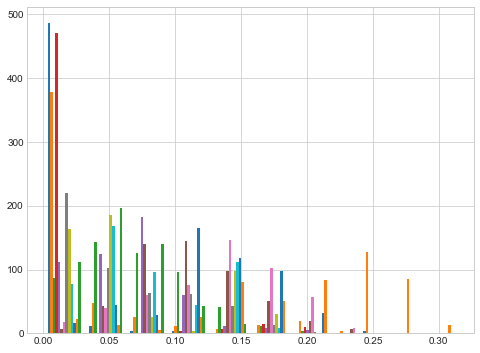

In [42]:
plt.figure(figsize=(8,6))
plt.hist(X_normalized);

In [48]:
pd.DataFrame(X_normalized, columns=boston_data.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.124581,0.046936,0.0,0.217889,0.399702,0.444067,0.186320,0.000000,0.143971,0.198800,0.692118,0.062069
1,0.000150,0.000000,0.153738,0.0,0.109665,0.347698,0.496612,0.221412,0.027586,0.066597,0.350993,0.634488,0.129734
2,0.000154,0.000000,0.157915,0.0,0.112644,0.452551,0.390634,0.227429,0.028336,0.068407,0.360531,0.645040,0.041362
3,0.000194,0.000000,0.041761,0.0,0.099488,0.436190,0.292632,0.297091,0.057595,0.044241,0.429819,0.658553,0.022115
4,0.000453,0.000000,0.040513,0.0,0.096517,0.441508,0.339479,0.288218,0.055875,0.042919,0.416982,0.642562,0.063831


### L2 normalization, Least squares, Ensure that the sum of squares is 1.

In [43]:
X_normalized = preprocessing.normalize(X_minmax, norm='l2')

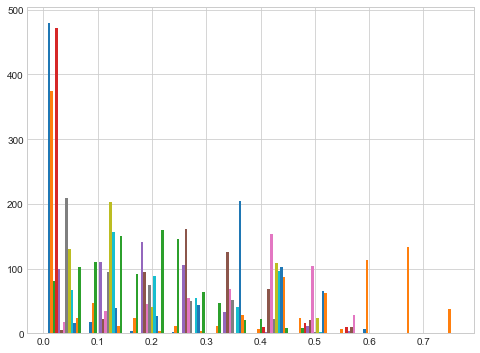

In [44]:
plt.figure(figsize=(8,6))
plt.hist(X_normalized);

In [49]:
pd.DataFrame(X_normalized, columns=boston_data.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.124581,0.046936,0.0,0.217889,0.399702,0.444067,0.186320,0.000000,0.143971,0.198800,0.692118,0.062069
1,0.000150,0.000000,0.153738,0.0,0.109665,0.347698,0.496612,0.221412,0.027586,0.066597,0.350993,0.634488,0.129734
2,0.000154,0.000000,0.157915,0.0,0.112644,0.452551,0.390634,0.227429,0.028336,0.068407,0.360531,0.645040,0.041362
3,0.000194,0.000000,0.041761,0.0,0.099488,0.436190,0.292632,0.297091,0.057595,0.044241,0.429819,0.658553,0.022115
4,0.000453,0.000000,0.040513,0.0,0.096517,0.441508,0.339479,0.288218,0.055875,0.042919,0.416982,0.642562,0.063831
